In [408]:
%matplotlib inline
import numpy as np
import compas
from compas.datastructures import Mesh
import compas.datastructures as ds
from compas_plotters import Plotter
import matplotlib.pyplot as plt
import networkx as nx 
import json
from pathlib import Path

In [409]:
fin = open('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Documents/GitHub/HDSS_test/data/my_igml_703.json')
j = json.loads(fin.read())


# Get the Mesh geometry
## Get the Mesh vertices

In [410]:
mesh_vertices=j['vertices']
print(mesh_vertices)

[[51.6, 50.15, 50.4], [151.6, 50.15, 50.4], [0.0, 0.0, 0.0], [0.0, 100.0, 0.0], [100.0, 100.0, 0.0], [100.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 100.0], [100.0, 0.0, 100.0], [100.0, 100.0, 100.0], [0.0, 100.0, 100.0], [0.0, 0.0, 100.0], [0.0, 0.0, 0.0], [100.0, 0.0, 0.0], [100.0, 0.0, 100.0], [0.0, 0.0, 100.0], [0.0, 0.0, 0.0], [100.0, 0.0, 0.0], [100.0, 100.0, 0.0], [100.0, 100.0, 100.0], [100.0, 0.0, 100.0], [100.0, 0.0, 0.0], [100.0, 100.0, 0.0], [0.0, 100.0, 0.0], [0.0, 100.0, 100.0], [100.0, 100.0, 100.0], [100.0, 100.0, 0.0], [0.0, 100.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 100.0], [0.0, 100.0, 100.0], [0.0, 100.0, 0.0], [100.0, 0.0, 0.0], [100.0, 100.0, 0.0], [200.0, 100.0, 0.0], [200.0, 0.0, 0.0], [100.0, 0.0, 0.0], [100.0, 0.0, 100.0], [200.0, 0.0, 100.0], [200.0, 100.0, 100.0], [100.0, 100.0, 100.0], [100.0, 0.0, 100.0], [100.0, 0.0, 0.0], [200.0, 0.0, 0.0], [200.0, 0.0, 100.0], [100.0, 0.0, 100.0], [100.0, 0.0, 0.0], [200.0, 0.0, 0.0], [200.0, 100.0, 0.0], [200.0, 100.0, 10

## Get the Mesh faces

In [411]:
def get_mesh_faces(jsonfile):
    cellspaces = []
    cell_faces = []

    for i in jsonfile['PrimalSpaceFeatures']['CellSpace']:
        cellspaces.append(i)
    for cs in cellspaces:
        cell_face = j['PrimalSpaceFeatures']['CellSpace'][cs]['geometry']['boundaries']
        
        cell_faces.append(cell_face)
    mesh_faces = [i for sl1 in cell_faces for sl2 in sl1 for sl3 in sl2 for i in sl3]
    return mesh_faces

mesh_faces = get_mesh_faces(j)
print(mesh_faces)




[[2, 3, 4, 5, 6], [7, 8, 9, 10, 11], [12, 13, 14, 15, 16], [17, 18, 19, 20, 21], [22, 23, 24, 25, 26], [27, 28, 29, 30, 31], [32, 33, 34, 35, 36], [37, 38, 39, 40, 41], [42, 43, 44, 45, 46], [47, 48, 49, 50, 51], [52, 53, 54, 55, 56], [57, 58, 59, 60, 61]]


## Create the Mesh geometry

In [412]:
mesh = Mesh.from_vertices_and_faces(mesh_vertices,mesh_faces)
print(mesh.summary())

Mesh summary
- vertices: 62
- edges: 60
- faces: 12


## Visualize the Mesh geometry

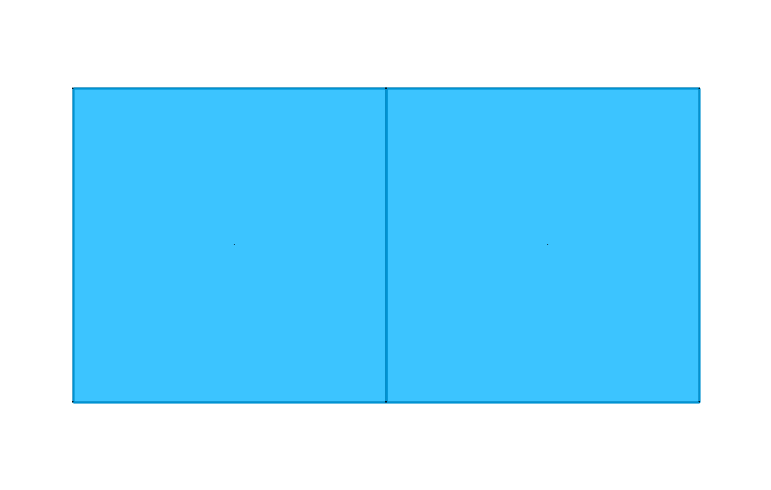

In [413]:
plotter_surface = Plotter()
plotter_surface.add(mesh)
plotter_surface.zoom_extents()
plotter_surface.show()

# Get the graph

## Get the nodes

In [414]:
fin_2 = open('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Documents/GitHub/HDSS_test/data/out.json')
j_2 = json.loads(fin_2.read())
print(len(j_2['PrimalSpaceFeatures']['CellSpace']))

14


In [415]:
def get_nodes_from_jsonfile(jfile):
    
    node_names = []
    nodes = []
    for spacelayer in jfile['SpaceLayers']:

        for i in jfile['SpaceLayers'][spacelayer]:
            node_names.append(i)
            for nd in node_names:
                node_id = jfile['SpaceLayers'][spacelayer][nd]['geometry']['boundaries']
            nodes.append(node_id)

    return nodes
    
nodes_1 = get_nodes_from_jsonfile(j)
nodes_2 = get_nodes_from_jsonfile(j_2)
print(nodes_1)
print(nodes_2)


[0, 1]
[0, 2, 8, 10, 12, 14, 16, 21, 23, 27, 30, 32, 36, 38]


In [416]:
def get_cell_node_pairs(jfile):
    nodes = get_nodes_from_jsonfile(jfile)
    node_names = []
    for sl in jfile['SpaceLayers']:
        for i in jfile['SpaceLayers'][sl]:
            node_names.append(i)
    cell_space_list = []
    for cell in jfile['PrimalSpaceFeatures']['CellSpace']:
        cell_space_list.append(cell)

    cell_node_pairs = dict(zip(cell_space_list,nodes))
    return cell_node_pairs

cn_pair = get_cell_node_pairs(j_2)
print(cn_pair)
    

{'C1': 0, 'C3': 2, 'C4': 8, 'C6': 10, 'C8': 12, 'C10': 14, 'C12': 16, 'C13': 21, 'C15': 23, 'C19': 27, 'C21': 30, 'C23': 32, 'C25': 36, 'C26': 38}


In [417]:
def are_cells_adjacent(a, b, j):
    if a not in j['PrimalSpaceFeatures']['CellSpace']:
        return False
    if b not in j['PrimalSpaceFeatures']['CellSpace']:
        return False
    ca = j['PrimalSpaceFeatures']['CellSpace'][a]
    cb = j['PrimalSpaceFeatures']['CellSpace'][b]
    # find the dual node
    dual_ca = j['SpaceLayers'][ca['duality-spacelayer']][ca['duality']]
    dual_cb = j['SpaceLayers'][cb['duality-spacelayer']][cb['duality']]
    bFound = False
    # iterate over the edges to see whether b is in a
    for e in dual_ca['edges']:
        if (e['destination'] == cb['duality']):
            bFound = True
            break
    if (bFound == False):
        # iterate over the edges to see whether a is in b
        for e in dual_cb['edges']:
            if (e['destination'] == ca['duality']):
                bFound = True
                break
    return bFound

In [418]:
'''cell_list = list(cn_pair.keys())
cell_pairs = []
checks = []
for i in range(len(cn_pair)):
    for j in range(i+1, len(cn_pair)):
        cell_pairs.append([cell_list[i],cell_list[j]])
        check = are_cells_adjacent(cell_list[i],cell_list[j],j_2)
        checks.append(check)
print(cell_pairs)
print(checks)'''
        

'cell_list = list(cn_pair.keys())\ncell_pairs = []\nchecks = []\nfor i in range(len(cn_pair)):\n    for j in range(i+1, len(cn_pair)):\n        cell_pairs.append([cell_list[i],cell_list[j]])\n        check = are_cells_adjacent(cell_list[i],cell_list[j],j_2)\n        checks.append(check)\nprint(cell_pairs)\nprint(checks)'

In [419]:
# get the adjacent cell pairs
def get_adjacent_cells(cn_pair,jfile):

    cell_list = list(cn_pair.keys())
    cell_pairs = []

    adjacent_cells = []
    for i in range(len(cn_pair)):
        for j in range(i+1, len(cn_pair)):
            cell_pair = [cell_list[i],cell_list[j]]
            cell_pairs.append(cell_pair)
            check = are_cells_adjacent(cell_list[i],cell_list[j],jfile)
            if check == True:
                adjacent_cells.append(cell_pair)
                    
    return adjacent_cells

adjacent_cells = get_adjacent_cells(cn_pair, j_2)
print(adjacent_cells)


[['C1', 'C3'], ['C3', 'C4'], ['C3', 'C6'], ['C3', 'C8'], ['C3', 'C10'], ['C3', 'C12'], ['C12', 'C13'], ['C12', 'C15'], ['C12', 'C19'], ['C12', 'C23'], ['C15', 'C19'], ['C21', 'C23'], ['C23', 'C25'], ['C23', 'C26']]


## 该下面这个了

In [420]:
# changing the adjacent cell pairs to node pairs
def get_adjacent_nodes(adjacent_cells, jfile):

    adjacent_nodes = []
    for ad_cell in adjacent_cells:
        
        edge_start_node = jfile['PrimalSpaceFeatures']['CellSpace'][ad_cell[0]]['duality']
        edge_end_node = jfile['PrimalSpaceFeatures']['CellSpace'][ad_cell[1]]['duality']
        edge = [edge_start_node,edge_end_node]
        adjacent_nodes.append(edge)

    return adjacent_nodes

adjacent_nodes = get_adjacent_nodes(adjacent_cells,j_2)
print(adjacent_nodes)


[['R1', 'R3'], ['R3', 'R4'], ['R3', 'R6'], ['R3', 'R8'], ['R3', 'R10'], ['R3', 'R12'], ['R12', 'R13'], ['R12', 'R15'], ['R12', 'R19'], ['R12', 'R23'], ['R15', 'R19'], ['R21', 'R23'], ['R23', 'R25'], ['R23', 'R26']]


In [421]:
# convert the node pairs to edges
def get_edges(adjacent_nodes, jfile):

    edges = []
    for sl in jfile['SpaceLayers']:
        for ad_node in adjacent_nodes:
            edge_start = jfile['SpaceLayers'][sl][ad_node[0]]['geometry']['boundaries']
            edge_end = jfile['SpaceLayers'][sl][ad_node[1]]['geometry']['boundaries']
            edges.append([edge_start,edge_end])

    return edges
edges_2 = get_edges(adjacent_nodes, j_2)
print(edges_2)

[[0, 2], [2, 8], [2, 10], [2, 12], [2, 14], [2, 16], [16, 21], [16, 23], [16, 27], [16, 32], [23, 27], [30, 32], [32, 36], [32, 38]]


In [422]:
def get_node_pairs(node_list):
    node_pair = []
    for i in range(len(node_list)):
        for j in range(i+1, len(node_list)):
            node_pair.append([node_list[i], node_list[j]])
    return node_pair

node_list_1 = get_node_pairs(nodes_1)
print(node_list_1)

node_list_2 = get_node_pairs(nodes_2)
print(node_list_2)

[[0, 1]]
[[0, 2], [0, 8], [0, 10], [0, 12], [0, 14], [0, 16], [0, 21], [0, 23], [0, 27], [0, 30], [0, 32], [0, 36], [0, 38], [2, 8], [2, 10], [2, 12], [2, 14], [2, 16], [2, 21], [2, 23], [2, 27], [2, 30], [2, 32], [2, 36], [2, 38], [8, 10], [8, 12], [8, 14], [8, 16], [8, 21], [8, 23], [8, 27], [8, 30], [8, 32], [8, 36], [8, 38], [10, 12], [10, 14], [10, 16], [10, 21], [10, 23], [10, 27], [10, 30], [10, 32], [10, 36], [10, 38], [12, 14], [12, 16], [12, 21], [12, 23], [12, 27], [12, 30], [12, 32], [12, 36], [12, 38], [14, 16], [14, 21], [14, 23], [14, 27], [14, 30], [14, 32], [14, 36], [14, 38], [16, 21], [16, 23], [16, 27], [16, 30], [16, 32], [16, 36], [16, 38], [21, 23], [21, 27], [21, 30], [21, 32], [21, 36], [21, 38], [23, 27], [23, 30], [23, 32], [23, 36], [23, 38], [27, 30], [27, 32], [27, 36], [27, 38], [30, 32], [30, 36], [30, 38], [32, 36], [32, 38], [36, 38]]


In [423]:
#自己提取edges

'''node_names = []
nodes = []
for spacelayer in j_2['SpaceLayers']:

    for i in j_2['SpaceLayers'][spacelayer]:
        node_names.append(i)
        for nd in node_names:
            node_id = j_2['SpaceLayers'][spacelayer][nd]['geometry']['boundaries']
        nodes.append(node_id)

print(nodes)
'''

"node_names = []\nnodes = []\nfor spacelayer in j_2['SpaceLayers']:\n\n    for i in j_2['SpaceLayers'][spacelayer]:\n        node_names.append(i)\n        for nd in node_names:\n            node_id = j_2['SpaceLayers'][spacelayer][nd]['geometry']['boundaries']\n        nodes.append(node_id)\n\nprint(nodes)\n"

In [424]:
# get the node's integer ID
print(j_2['SpaceLayers']['IS1']['R3']['geometry']['boundaries'])

2
